In [2]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras import optimizers

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization 

# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
ATT_FILE = '/gdrive/My Drive/Colab Notebooks/Datasets/OceanProximityPreparedCleanAttributes.csv'
LABEL_FILE = '/gdrive/My Drive/Colab Notebooks/Datasets/OceanProximityOneHotEncodedClasses.csv'

In [4]:
TRAIN_RATE=0.8 # For the whole dataset

attributes = pd.read_csv(ATT_FILE)
label = pd.read_csv(LABEL_FILE)

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2) # 10% for development testing
n_final_test = n_instances-n_train-n_dev #10% for final testing purposes

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train+n_dev]
t_dev = label.values[n_train:n_train+n_dev]

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

x_train: (16342, 9)
t_train: (16342, 4)
x_dev: (2043, 9)
t_dev: (2043, 4)


In [0]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))

In [0]:
# Hyperparameters

n_epochs = 200 
learning_rate = 0.1
batch_size = 50
n_neurons_per_hlayer = [10000, 10000, 10000] 

In [7]:
# Build the deep neural model

model = keras.Sequential()

model.add(keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None))

for neurons in n_neurons_per_hlayer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  
  model.add(keras.layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

# Compiling the model

#model.compile(loss=tf.keras.losses.categorical_crossentropy,
#             optimizer=tf.keras.optimizers.SGD(lr=learning_rate),
#              metrics=["categorical_accuracy"])

model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              metrics=["categorical_accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             100000    
_________________________________________________________________
dropout (Dropout)            (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10000)             100010000 
_________________________________________________________________
dropout_1 (Dropout)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10000)             100010000 
_________________________________________________________________
dropout_2 (Dropout)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 4

In [8]:
import time
start = time.clock()
history = model.fit(x_train, t_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_dev, t_dev))    

print (time.clock() - start)

Epoch 1/200
327/327 [==============================] - 9s 27ms/step - loss: 0.5922 - categorical_accuracy: 0.7777 - val_loss: 0.3247 - val_categorical_accuracy: 0.8585
Epoch 2/200
327/327 [==============================] - 9s 27ms/step - loss: 0.3952 - categorical_accuracy: 0.8410 - val_loss: 0.3605 - val_categorical_accuracy: 0.8605
Epoch 3/200
327/327 [==============================] - 9s 27ms/step - loss: 0.3533 - categorical_accuracy: 0.8587 - val_loss: 0.3658 - val_categorical_accuracy: 0.8605
Epoch 4/200
327/327 [==============================] - 9s 27ms/step - loss: 0.3212 - categorical_accuracy: 0.8697 - val_loss: 0.2382 - val_categorical_accuracy: 0.9001
Epoch 5/200
327/327 [==============================] - 9s 27ms/step - loss: 0.3055 - categorical_accuracy: 0.8754 - val_loss: 0.2883 - val_categorical_accuracy: 0.8732
Epoch 6/200
327/327 [==============================] - 9s 27ms/step - loss: 0.2910 - categorical_accuracy: 0.8806 - val_loss: 0.2623 - val_categorical_accuracy:

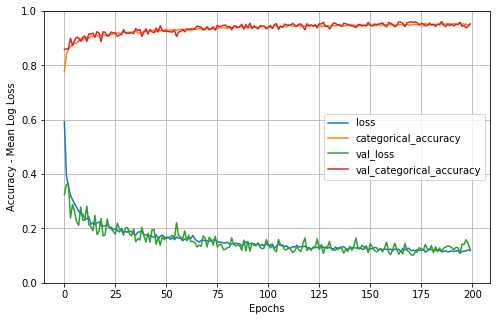

In [9]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [10]:
print ("Error (training): ", 
       round((1 - results.categorical_accuracy.values[-1:][0])*100, 2), "%")
print ("Error (development test): ", 
       round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 2), "%")
print ("Time: ", 
       round((time.clock() - start)),"seconds")

Error (training):  5.0 %
Error (development test):  4.7 %
Time:  1557 seconds
